# Module 3 Exam
<hr>

## Import Library

In [376]:
# Basic Operations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Evaluation
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

## Import Dataset

In [281]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Data Selection

In [282]:
# Data yang digunakan hanya 5000 row
df = df[:5000]

In [283]:
# Variabel yang dipakai hanya 16, yaitu:
df = df[['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']]
df.info()
# Dapat dilihat, terdapat missing value pada feature country

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        5000 non-null   object 
 1   is_canceled                  5000 non-null   int64  
 2   adults                       5000 non-null   int64  
 3   children                     5000 non-null   float64
 4   babies                       5000 non-null   int64  
 5   meal                         5000 non-null   object 
 6   country                      4998 non-null   object 
 7   market_segment               5000 non-null   object 
 8   distribution_channel         5000 non-null   object 
 9   reserved_room_type           5000 non-null   object 
 10  booking_changes              5000 non-null   int64  
 11  deposit_type                 5000 non-null   object 
 12  days_in_waiting_list         5000 non-null   int64  
 13  customer_type     

## Exploratory Data Analysis

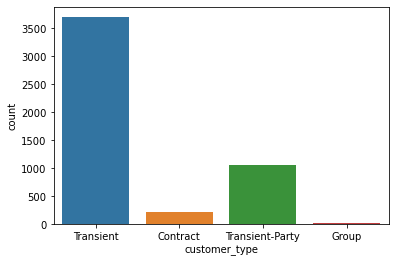

In [284]:
sns.countplot(x = 'customer_type', data = df)
# Secara umum, tipe customer adalah Transient

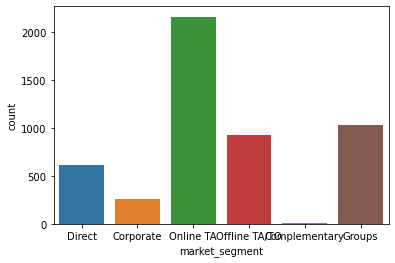

In [285]:
sns.countplot(x = 'market_segment', data = df)
# Secara umum, market segmentation dari customer hotel adalah Online TA, Offline TA/TO dan Groups

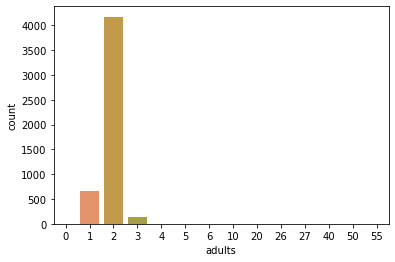

In [286]:
sns.countplot(x = 'adults', data = df)
# Secara umum, customer hotel datang sebagai pasangan

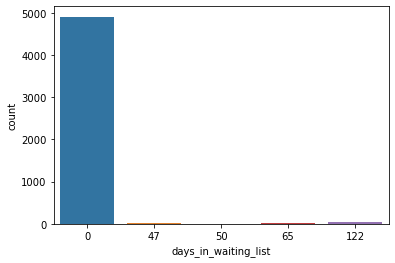

In [287]:
sns.countplot(x = 'days_in_waiting_list', data = df)

In [288]:
df[df['days_in_waiting_list'] != 0]
# Terdapat 95 customer yang termasuk waiting list di atas 0 hari

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
2272,Resort Hotel,0,2,0.0,0,BB,PRT,Corporate,Corporate,A,0,No Deposit,50,Contract,0,0
2486,Resort Hotel,0,2,0.0,0,HB,ESP,Groups,Direct,A,0,No Deposit,47,Transient-Party,0,0
2487,Resort Hotel,0,2,0.0,0,HB,ESP,Groups,Direct,A,0,No Deposit,47,Transient-Party,0,0
2488,Resort Hotel,0,2,0.0,0,HB,ESP,Groups,Direct,A,0,No Deposit,47,Transient-Party,0,0
2490,Resort Hotel,0,2,0.0,0,HB,ESP,Groups,Direct,A,0,No Deposit,47,Transient-Party,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3703,Resort Hotel,0,2,0.0,0,Undefined,PRT,Groups,TA/TO,A,0,No Deposit,122,Transient,0,0
3704,Resort Hotel,0,2,0.0,0,Undefined,PRT,Groups,TA/TO,A,0,No Deposit,122,Transient-Party,0,0
3705,Resort Hotel,0,1,0.0,0,HB,PRT,Groups,TA/TO,A,5,No Deposit,122,Transient-Party,0,0
3706,Resort Hotel,0,1,0.0,0,HB,PRT,Groups,TA/TO,A,1,No Deposit,122,Transient-Party,0,0


>## Identifikasi Profil Customer yang Melakukan Pembatalan Booking

In [289]:
df.head()
# Feature is_canceled sebagai label
# Feature akan dibagi menjadi 2 kelompok: profil customer dan kebiasaan customer
# Profil customer : ['adults','children','babies','country','market_segment','customer_type']

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1


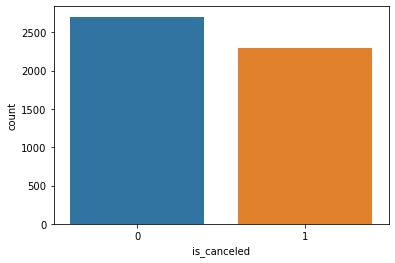

In [290]:
sns.countplot(x = 'is_canceled', data = df)
# Data pembatalan booking dan booking yang tidak dicancel hampir berimbang (2702 : 2298)

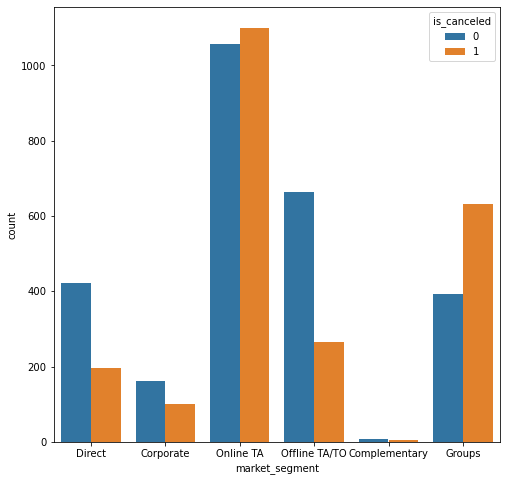

In [291]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'market_segment', data = df, hue = 'is_canceled')
# Pada market segment Online TA, dan Groups, konsumen cenderung lebih tinggi pembatalan bookingnya
# Pada market Direct, Corporate, Offline TA/TO tingkat pembatalan booking lebih rendah dibandingkan yang tidak dicancel
# Perlu diketahui lebih lanjut, tipe customer seperti apa yang melakukan cancellation booking pada Online TA dan Groups

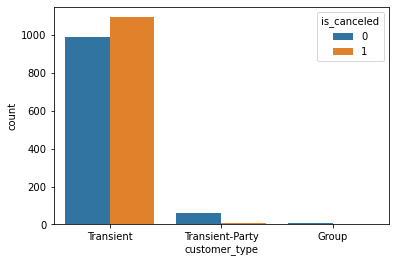

In [292]:
sns.countplot(x = df[df['market_segment'] == "Online TA"]['customer_type'], data = df, hue = 'is_canceled')
# Berdasarkan grafik, pembatalan booking paling tinggi pada market segment Online TA adalah tipe customer Transient, yaitu yang menginap dalam jangka waktu pendek dan tidak berkelompok

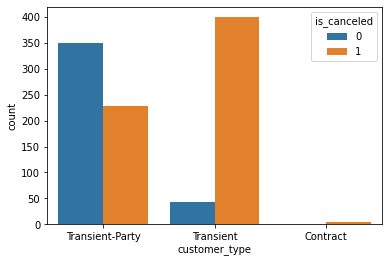

In [293]:
sns.countplot(x = df[df['market_segment'] == "Groups"]['customer_type'], data = df, hue = 'is_canceled')
# Pada market segment Groups pun, pembatalan booking tertinggi masih tetap pada tipe customer Transient.
# Perlu dilakukan evaluasi terhadap customer Transient secara keseluruhan

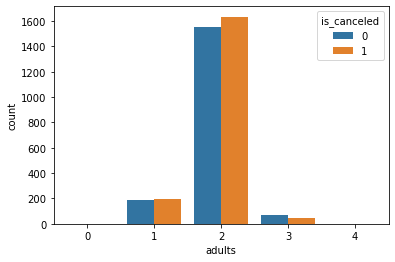

In [294]:
sns.countplot(x = df[df['customer_type'] == "Transient"]['adults'], data = df, hue = 'is_canceled')

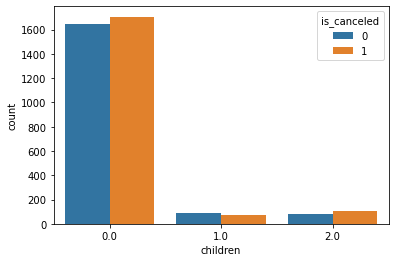

In [295]:
sns.countplot(x = df[df['customer_type'] == "Transient"]['children'], data = df, hue = 'is_canceled')

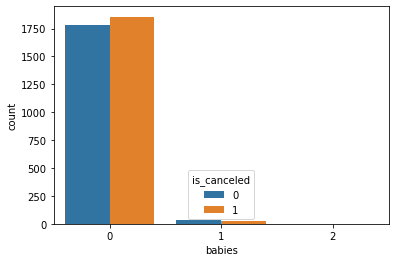

In [296]:
sns.countplot(x = df[df['customer_type'] == "Transient"]['babies'], data = df, hue = 'is_canceled')
# Dari 3 grafik di atas, dapat dilihat customer Transient didominasi oleh pasangan tanpa anak

In [297]:
df[ (df['customer_type'] == "Transient") & (df['is_canceled'] == 1)]['country'].value_counts()
# Customer dari Portugal dengan tipe Transient paling banyak melakukan cancel booking dibandingkan negara - negara lain

PRT    1785
ESP      40
GBR      29
CN       13
IRL       4
ITA       3
DEU       3
FRA       2
Name: country, dtype: int64

In [298]:
df[ (df['customer_type'] == "Transient") & (df['is_canceled'] == 1) & (df['country'] == "PRT")]['market_segment'].value_counts()
# Market segmentation yang melakukan pembatalan reservasi oleh customer dari Portugal, pada umumnya adalah Online TA dan Groups

Online TA        1070
Groups            335
Direct            171
Offline TA/TO     169
Corporate          36
Complementary       4
Name: market_segment, dtype: int64

>## Identifikasi Kebiasaan Customer di Hotel

In [299]:
df.head()
# Kebiasaan customer : ['hotel','meal','distribution_channel','reserved_room_type','booking_changes','deposit_type','days_in_waiting_list','required_car_parking_spaces','total_of_special_requests']

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1


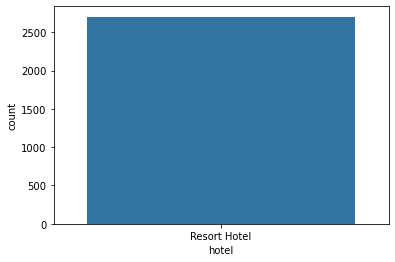

In [300]:
sns.countplot(df[df['is_canceled'] == 0]['hotel'])
# Semua booking untuk resort hotel

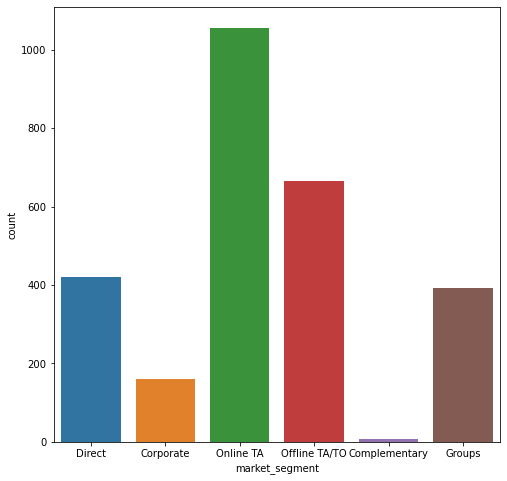

In [301]:
plt.figure(figsize = (8,8))
sns.countplot(df[df['is_canceled'] == 0]['market_segment'])
# Customer didominasi oleh Online TA dan Offline TA/TO. 

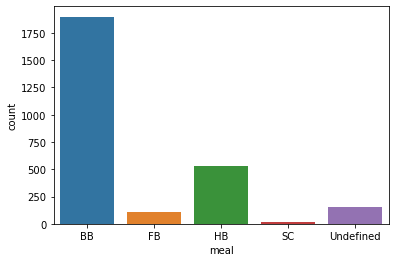

In [302]:
sns.countplot(df[df['is_canceled'] == 0]['meal'])
# Makanan yang dipesan hanya untuk breakfast, dapat diduga terdapat opsi kuliner di luar hotel resort

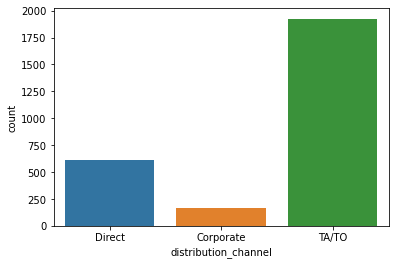

In [303]:
sns.countplot(df[df['is_canceled'] == 0]['distribution_channel'])
# Customer pada umumnya menggunakan jasa TA/TO

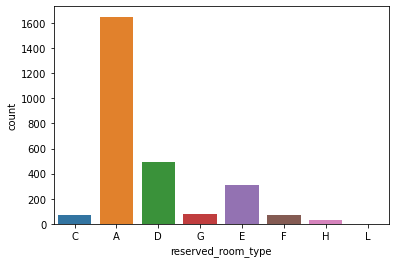

In [304]:
sns.countplot(df[df['is_canceled'] == 0]['reserved_room_type'])
# Room yang dipesan didominasi oleh tipe A

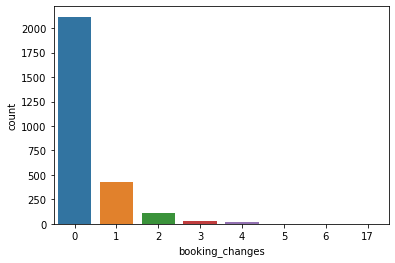

In [305]:
sns.countplot(df[df['is_canceled'] == 0]['booking_changes'])
# Customer dalam melakukan pemesanan sudah tahu apa yang dibooking, tidak terdapat banyak pergantian

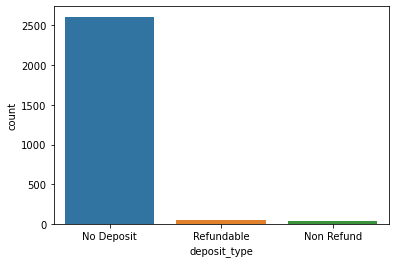

In [306]:
sns.countplot(df[df['is_canceled'] == 0]['deposit_type'])
# Pada umumnya tidak melakukan deposit

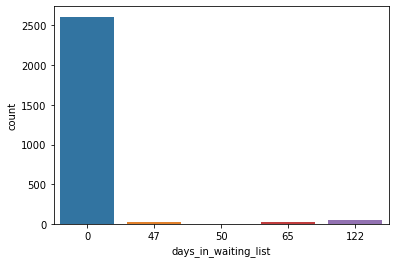

In [307]:
sns.countplot(df[df['is_canceled'] == 0]['days_in_waiting_list'])
# Tidak memerlukan waiting list, namun perlu dicek, mengapa terdapat waiting list mencapai 47, 65, dan 122 hari

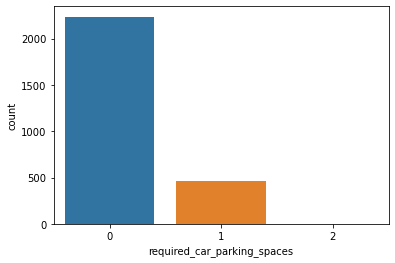

In [308]:
sns.countplot(df[df['is_canceled'] == 0]['required_car_parking_spaces'])
# Customer pada umumnya tidak membawa kendaraan. 

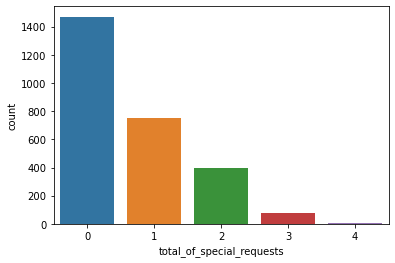

In [309]:
sns.countplot(df[df['is_canceled'] == 0]['total_of_special_requests'])
# Kurang lebih setengah dari customer tidak melakukan special request

In [310]:
top_5 = df[df['is_canceled'] == 0]['country'].value_counts()/df.shape[0]*100
top_5.head()

PRT    19.70
ESP    10.12
GBR     9.34
IRL     3.34
FRA     2.22
Name: country, dtype: float64

# Kesimpulan:
- Secara umum, customer melakukan reservasi sebagai pasangan (2 orang) dan untuk liburan singkat (Transient)
- Secara umum, customer pada umumnya melakukan reservasi melalui Online TA atau Offline TA/TO, diikuti oleh Group dan Direct
- Secara spesifik, customer yang melakukan pembatalan reservasi pada umumnya dengan profil: pasangan yang hendak liburan singkat (Transient), melakukan pemesanan melalui Online TA dan didomnasi customer dari Portugal
- Secara spesifik, customer yang sudah menginap di hotel adalah dengan profil: hanya makan breakfast, melakukan reservasi melalui Online TA, pada umumnya memilih kamar dengan tipe A, tidak 'rewel' dalam melakukan reservasi (jarang ada special request dan booking changes), tidak membawa mobil, dan didominasi oleh customer yang berasal dari Portugal, Spanyol, dan Great Britain

# Suggestion:
- Pangsa pasar utama adalah couple yang Transient, oleh karena itu, dibutuhkan servis yang lebih memanjakan pasangan yang ingin menikmati hotel resort
- Melakukan penetrasi pasar yang lebih dalam dan gencar melalui Travel Agency (buat kerjasama dan promosi dengan travel agent yang belum bekerjasama) terutama untuk negara Portugal dan Spanyol
- Karena pangsa pasar adalah customer dari Spanyol dan Portugal, melakukan training kepada karyawan agar dapat menyambut dengan bahasa portugis dan spanish
- Memerbaiki menu yang disajikan di hotel. Karena idealnya, hotel resort menjadi tempat liburan hanya di satu tempat itu saja, yaitu di hotel tersebut. Apabila customer mencari makan di tempat lain (yang ditunjukkan dengan customer pada umumnya memesan makan hanya untuk breakfast saja), menjadi catatan tersendiri terhadap kitchen di hotel tersebut
- Karena reservasi yang dicancel maupun tidak berasal dari kategori konsumen yang sama, perlu dilakukan evaluasi, mengapa konsumen melakukan cancellation booking. Apakah dari aspek pelayanan hotel atau kompetisi dengan hotel lain.

## Data Preprocessing

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        5000 non-null   object 
 1   is_canceled                  5000 non-null   int64  
 2   adults                       5000 non-null   int64  
 3   children                     5000 non-null   float64
 4   babies                       5000 non-null   int64  
 5   meal                         5000 non-null   object 
 6   country                      4998 non-null   object 
 7   market_segment               5000 non-null   object 
 8   distribution_channel         5000 non-null   object 
 9   reserved_room_type           5000 non-null   object 
 10  booking_changes              5000 non-null   int64  
 11  deposit_type                 5000 non-null   object 
 12  days_in_waiting_list         5000 non-null   int64  
 13  customer_type     

In [312]:
df.describe(include = 'object')
# Feature yang datanya non-numerik
# Diperlukan pengecekkan terhadap kategori yang hanya memiliki 1 row pada setiap feature. Mencegah adanya splitting data yang tidak rata dalam 1 kategori

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
count,5000,5000,4998,5000,5000,5000,5000,5000
unique,1,5,56,6,3,9,3,4
top,Resort Hotel,BB,PRT,Online TA,TA/TO,A,No Deposit,Transient
freq,5000,3418,3174,2156,3657,3167,4461,3699


In [313]:
(df['country'].value_counts() == 1).sum()
# Terdapat 15 kategori dari feature 'country' yang memiliki 1 row

15

In [314]:
(df['country'].value_counts() == 1)

PRT    False
ESP    False
GBR    False
IRL    False
FRA    False
DEU    False
NLD    False
CN     False
BEL    False
POL    False
USA    False
CHE    False
RUS    False
ITA    False
BRA    False
AUT    False
ROU    False
LUX    False
FIN    False
SWE    False
DNK    False
LVA    False
ARG    False
CHN    False
NOR    False
AUS    False
IND    False
KOR    False
CZE    False
LTU    False
EST    False
OMN    False
MOZ    False
CRI    False
CHL    False
ZAF    False
MEX    False
SVN    False
TUR    False
DZA    False
MAR    False
ISR     True
AGO     True
GRC     True
HUN     True
CPV     True
BWA     True
ALB     True
UKR     True
BLR     True
ZWE     True
CYM     True
SMR     True
ZMB     True
PRI     True
SRB     True
Name: country, dtype: bool

In [315]:
(df['reserved_room_type'].value_counts() == 1).sum()
# Terdapat 1 kategori dari feature 'country' yang memiliki 1 row

1

In [316]:
(df['reserved_room_type'].value_counts() == 1)

A    False
D    False
E    False
G    False
C    False
F    False
H    False
L    False
P     True
Name: reserved_room_type, dtype: bool

In [317]:
df[df['country'].isna()]
# Missing value pada feature 'country' terdapat 1 row yang memiliki kategori 'P' pada feature 'reserved_room_type'
# Jadi hanya 1 missing value yang perlu di-impute (karena feature 'reserved_room_type' yang memiiki kategori 'P' akan di drop)

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
30,Resort Hotel,0,1,0.0,0,BB,NaN,Direct,Direct,A,2,No Deposit,0,Transient,0,2
4127,Resort Hotel,1,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,P,0,No Deposit,0,Transient,0,0


## Tahap Preprocessing:
- Feature 'hotel' hanya memiliki 1 kategori, jadi bisa didrop
- Drop kategori pada feature 'country' (ada 15) dan 'reserved_room_type' (ada 1) yang hanya memiliki 1 row agar tidak menganggu proses splitting data
- Terdapat missing value pada feature 'country' (2, namun 1 data memiliki kategori 'P' pada feature 'reserved_room_type' sehingga akan didrop)
- Melakukan encoding terhadap feature berikut: ['meal','country','market_segment','distribution_channel','reserved_room_type','deposit_type','customer_type']
- Melakukan encoding dengan OneHot: ['meal','market_segment','distribution_channel','reserved_room_type','deposit_type','customer_type']
- Melakukan encoding dengan Binary dan SimpleImputer pada feature: ['country']. Binary dipilih karena kategori pada feature 'country', cukup banyak dibandingkan feature lain. 

In [318]:
df = df.drop(columns = ['hotel'],axis = 0)

In [319]:
list_country_drop = ['ISR','AGO','GRC','HUN','CPV','BWA','ALB','UKR','BLR','ZWE','CYM','SMR','ZMB','PRI','SRB']
list_room_drop = ['P']

In [320]:
drop_country = df[df['country'].isin(list_country_drop)]
drop_room = df[df['reserved_room_type'].isin(list_room_drop)]

In [321]:
drop_country.index #[ 172,  496,  653, 1515, 1531, 1708, 1710, 2059, 2242, 2340, 2557, 2672, 2763, 2905, 4126]

Int64Index([ 172,  496,  653, 1515, 1531, 1708, 1710, 2059, 2242, 2340, 2557,
            2672, 2763, 2905, 4126],
           dtype='int64')

In [322]:
drop_room.index #[4127]

Int64Index([4127], dtype='int64')

In [323]:
df.drop(labels = [172,  496,  653, 1515, 1531, 1708, 1710, 2059, 2242, 2340, 2557,2672, 2763, 2905, 4126, 4127], axis = 0, inplace = True)

In [324]:
binary_fill = Pipeline([('fillna', SimpleImputer(strategy = 'most_frequent')),
                        ('encode', ce.BinaryEncoder())
                        ])

transformer = ColumnTransformer([
                ('one_hot', OneHotEncoder(drop = 'first'),['meal','market_segment','distribution_channel','reserved_room_type','deposit_type','customer_type']),
                ('binary_fill', binary_fill, ['country']),                       
                                ], remainder = 'passthrough')

## Data Splitting

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4984 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_canceled                  4984 non-null   int64  
 1   adults                       4984 non-null   int64  
 2   children                     4984 non-null   float64
 3   babies                       4984 non-null   int64  
 4   meal                         4984 non-null   object 
 5   country                      4983 non-null   object 
 6   market_segment               4984 non-null   object 
 7   distribution_channel         4984 non-null   object 
 8   reserved_room_type           4984 non-null   object 
 9   booking_changes              4984 non-null   int64  
 10  deposit_type                 4984 non-null   object 
 11  days_in_waiting_list         4984 non-null   int64  
 12  customer_type                4984 non-null   object 
 13  required_car_parki

In [326]:
X = df.drop(columns = ['is_canceled'], axis = 1)
y = df['is_canceled']

In [327]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 2020)

## Model Benchmark Selection

### Model yang akan dipilih adalah:
- Logistic Regression adalah statistical method untuk menganalisis dataset yang memiliki feature 1 atau lebih dari 1, dan outputnya adalah binary class type. Secara umum, cara kerjanya sama dengan linear regression, namun menggunakan sigmoid function (nilai yang di prediksi akan terletak pada probabilitas dengan range 0 - 1)
- Decision Tree secara prinsip merupakan sebuah set pertanyaan if-else yang outputnya akan mengerucut kepada sebuah prediksi. Mudah digunakan dan cukup fleksibel untuk data yang beraneka ragam
- Random Forest memiliki cara kerja yang sama dengan Decision Tree dengan melakukan bootstraping

### Metrics Evaluation yang akan digunakan adalah F1 Score. Hal ini dilakukan untuk meminimalkan false positive (diprediksi cancel, ternyata tidak cancel) dan false negative (diprediksi tidak cancel, ternyata cancel). Hal ini karena:
- False Positive harus diminimalkan agar customer yang sudah datang ke hotel mendapatkan pelayanan yang maksimal agar customer puas dan terjadi repeat order(stay). Hal ini sangat penting karena hotel adalah bisnis yang menekankan aspek kenyamanan dan service. Apabila terjadi skenario, dimana diprediksi customer A akan cancel, dan ternyata customer tersebut tidak cancel, dan kamar yang sudah disiapkan untuk customer A diberikan pada Customer B, maka akan terjadi distrust dari customer.
- False Negative harus diminimalkan agar pada saat peak season, pihak hotel dapat memberikan kepastian kepada waiting list. (Walaupun pada data yang tersedia, hanya 95 dari 5000 customer yang dimasukkan sebagai waiting list), mengefisienkan FnB (karena hotel perlu mempersiapkan bahan makanan untuk setiap tamu yang ada), rencana hire tenaga kerja tambahan, apabila dirasa kurang pada peak season.

Oleh karena itu, 2 kesalahan yang dapat disebabkan oleh machine learning harus diperhatikan secara seimbang. Diperlukan adanya evaluasi yang dapat menekan nilai false positive dan false negative, yaitu menggunakan F1 Score.

In [328]:
models = [
    ['Logistic Regression',LogisticRegression()],
    ['Decision Tree',DecisionTreeClassifier()],
    ['Random Forest',RandomForestClassifier()]
]

def evaluate(models):
    model_name = []
    f1_score = []
    f1_std = []

    for name, model in models:

        estimator = Pipeline([('preprocess',transformer),
                              ('model',model)])
                                
        skfold = StratifiedKFold(n_splits=5)

        model_name.append(name)
        f1_score.append(cross_val_score(estimator, X_train, y_train, cv = skfold, scoring = 'f1').mean())
        f1_std.append(cross_val_score(estimator, X_train, y_train, cv = skfold, scoring = 'f1').std())

    return pd.DataFrame({
        'model':model_name,
        'f1_score':f1_score,
        'f1_std':f1_std
        })
evaluate(models)
# Berdasarkan f1 score, Logistic Regression memiliki f1 score paling tinggi dengan standar deviasi kedua terendah. Oleh karena itu Logistic Regression menjadi benchmark model

,model,f1_score,f1_std
0,Logistic Regression,0.857946,0.008315
1,Decision Tree,0.852885,0.008652
2,Random Forest,0.856143,0.008073


## Best Model on Data Test

In [332]:
estimator = Pipeline([('preprocess',transformer),('model',LogisticRegression())])
estimator.fit(X_train, y_train)
f1_score(y_test, estimator.predict(X_test))

0.853146853146853

## Hyperparameter Tuning

## Parameter Tuning
- solver: Parameter untuk menentukan algoritma yang akan digunakan
- max_iter: Jumlah iterasi yang akan dikerjakan
- C: Meregulasi penalti yang akan dikenakan kepada algoritma untuk mengurangi overfitting

In [335]:
# make the algorithm chains
model =  LogisticRegression()
estimator = Pipeline([('preprocess', transformer),('clf',model)])

# hyperparameter space
hyperparam_space = {
    'clf__solver': ['newton-cg','liblinear'],
    'clf__max_iter': [100, 200, 300],
    'clf__C': [1000, 100, 10, 0.1, 0.01, 0.001]
    }

# stratified cross vaidation
skf = StratifiedKFold(n_splits = 5)

# hyperparameter tuning
grid_search = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skf, # evaluation method
    scoring = 'f1', # metrics
    n_jobs = -1 # use all cores
)

In [336]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['meal',
                                                                          'market_segment',
                                                                          'distribution_channel',
                                                                          'reserved_room_type',
                                                                          'deposit_type',
                                                                          'customer_type']),
                                               

In [337]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'clf__C': 10, 'clf__max_iter': 100, 'clf__solver': 'liblinear'}
0.8550671236646737


In [338]:
grid_search.best_estimator_.fit(X_train, y_train)
f1_score(y_test, grid_search.best_estimator_.predict(X_test))
# Dengan parameter yang sudah ditentukan, terdapat kenaikan sedikit terhadap f1 scorenya. Dengan pemilihan parameter yang sudah ditentukan, dapat disimpulkan hyperparameter tuning tidak berpengaruh signifikan terhadap f1 score machine learning

0.855144855144855

## Optimasi Machine Learning : 1. Dealing with Imbalance Dataset

### Terdapat 3 metode yang dapat digunakan untuk dataset yang imbalance (walaupun perbedaannya tidak terlalu jauh, antara data label 0 dan 1):
- Oversampling
- Undersampling
- Penalized

> ## Oversampling with SMOTE

In [344]:
smote = SMOTE()
model =  LogisticRegression()
estimator = Pipeline([('preprocess', transformer),('balancing',smote),('clf',model)])

skfold = StratifiedKFold(n_splits = 5)
model_cv = cross_val_score(estimator, X_train, y_train, cv = skfold, scoring = 'f1')

print('cv score: ', model_cv)
print('cv score mean: ', model_cv.mean())
print('cv score std: ', model_cv.std())

cv score:  [0.85574572 0.85432099 0.85054678 0.87453416 0.8556962 ]
cv score mean:  0.8581687706041894
cv score std:  0.008398939850940215


> ## Undersampling with NearMiss

In [345]:
nearmiss = NearMiss()
model =  LogisticRegression()
estimator = Pipeline([('preprocess', transformer),('balancing',nearmiss),('clf',model)])

skfold = StratifiedKFold(n_splits = 5)
model_cv = cross_val_score(estimator, X_train, y_train, cv = skfold, scoring = 'f1')

print('cv score: ', model_cv)
print('cv score mean: ', model_cv.mean())
print('cv score std: ', model_cv.std())

cv score:  [0.84745763 0.84313725 0.83793517 0.86386139 0.84556962]
cv score mean:  0.8475922124964022
cv score std:  0.008739565686591268


> ## Penalized with Algorithm Based

In [347]:
model =  LogisticRegression(class_weight = 'balanced')
estimator = Pipeline([('preprocess', transformer),('clf',model)])

skfold = StratifiedKFold(n_splits = 5)
model_cv = cross_val_score(estimator, X_train, y_train, cv = skfold, scoring = 'f1')

print('cv score: ', model_cv)
print('cv score mean: ', model_cv.mean())
print('cv score std: ', model_cv.std())

cv score:  [0.85609756 0.8546798  0.84885127 0.87484511 0.85245902]
cv score mean:  0.8573865510604858
cv score std:  0.0090655471376988


### Kesimpulan : Tidak terdapat kenaikan atau penurunan yang signifikan terhadap f1 score dengan 3 metode di atas. Dapat disimpulkan, data cukup balance

## Optimasi Machine Learning : 2. Perbanyak Parameter Tuning

In [351]:
# make the algorithm chains
model =  LogisticRegression()
estimator = Pipeline([('preprocess', transformer),('clf',model)])

# hyperparameter space
hyperparam_space = {
    'clf__solver': ['newton-cg','liblinear'],
    'clf__max_iter': [100, 150, 200, 250, 300],
    'clf__C': [100, 50, 25, 10, 0.1, 0.01, 0.001]
    }

# stratified cross vaidation
skf = StratifiedKFold(n_splits = 5)

# hyperparameter tuning
grid_search = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skf, # evaluation method
    scoring = 'f1', # metrics
    n_jobs = -1 # use all cores
)

In [352]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['meal',
                                                                          'market_segment',
                                                                          'distribution_channel',
                                                                          'reserved_room_type',
                                                                          'deposit_type',
                                                                          'customer_type']),
                                               

In [353]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'clf__C': 10, 'clf__max_iter': 100, 'clf__solver': 'liblinear'}
0.8550671236646737


In [354]:
grid_search.best_estimator_.fit(X_train, y_train)
f1_score(y_test, grid_search.best_estimator_.predict(X_test))

0.855144855144855

### Kesimpulan : Meskipun parameternya sudah ditambah, namun belom dapat meningkatkan performa machine learning

## Optimasi Machine Learning : 3. Scaling

### Scaling secara umum dapat meningkatkan performa machine learning dengan melakukan adjustment terhadap jarak antara data point. Pada dataset ini akan digunakan Robust Scaler yang tidak sensitif terhadap outliers dan menggunakan kuantil dalam perhitungannya

In [360]:
robust = RobustScaler()

# make the algorithm chains
model =  LogisticRegression()
estimator = Pipeline([('preprocess', transformer),('scaling', robust), ('clf',model)])

# hyperparameter space
hyperparam_space = {
    'clf__solver': ['newton-cg','liblinear'],
    'clf__max_iter': [100, 200, 300],
    'clf__C': [1000, 100, 10, 0.1, 0.01, 0.001]
    }

# stratified cross vaidation
skf = StratifiedKFold(n_splits = 5)

# hyperparameter tuning
grid_search = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skf, # evaluation method
    scoring = 'f1', # metrics
    n_jobs = -1 # use all cores
)

In [361]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['meal',
                                                                          'market_segment',
                                                                          'distribution_channel',
                                                                          'reserved_room_type',
                                                                          'deposit_type',
                                                                          'customer_type']),
                                               

In [362]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'clf__C': 10, 'clf__max_iter': 100, 'clf__solver': 'liblinear'}
0.8549278938621632


In [363]:
grid_search.best_estimator_.fit(X_train, y_train)
f1_score(y_test, grid_search.best_estimator_.predict(X_test))

0.854

### Kesimpulan : Scaling dengan metode Robust pun tidak dapat meningkatkan performa machine learning

## Optimasi Machine Learning : 4. Feature Selection

### Kesimpulan: Feature Selection dapat dilakukan dengan memilih ulang feature - feature yang memiliki korelasi tinggi dengan feature 'is_canceled'

## Final Conclusion

- Model Machine Learning yang digunakan adalah Logistic Regression dengan nilai F1 Score 0.853146853146853
- Setelah dilakukan hyperparameter tuning, nilai F1 score menjadi 0.8550671236646737
- Parameter tuning yang digunakan adalah C: 10, max_iter: 100, dan solver:'liblinear'